## 라이브러리 가져오기

In [1]:
import numpy as np
import pandas as pd

## 데이터프레임 가공하기

In [2]:
df = pd.read_csv('./data/(청소년 2005~2020) 데이터.csv', encoding='euc-kr')
df

,응답자특성별(1),응답자특성별(2),2005,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,...,2019.8,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8
0,응답자특성별(1),응답자특성별(2),전체,전체,전체,남학생,남학생,남학생,여학생,여학생,...,여학생,전체,전체,전체,남학생,남학생,남학생,여학생,여학생,여학생
1,응답자특성별(1),응답자특성별(2),분석대상자수 (명),시도율 (%),표준오차,분석대상자수 (명),시도율 (%),표준오차,분석대상자수 (명),시도율 (%),...,표준오차,분석대상자수 (명),시도율 (%),표준오차,분석대상자수 (명),시도율 (%),표준오차,분석대상자수 (명),시도율 (%),표준오차
2,전체,소계,58224,4.7,0.1,29874,3.6,0.1,28350,5.9,...,0.1,54948,2.0,0.1,28353,1.4,0.1,26595,2.7,0.1
3,학년별,중1,12167,4.6,0.2,6281,3.2,0.3,5886,6.2,...,0.3,10005,2.0,0.1,5098,1.3,0.2,4907,2.7,0.2
4,학년별,중2,11998,5.2,0.3,6118,3.4,0.3,5880,7.2,...,0.3,9564,1.9,0.2,4823,1.4,0.2,4741,2.4,0.2
5,학년별,중3,11384,5.0,0.3,5836,4.0,0.3,5548,6.1,...,0.3,9392,2.1,0.1,4909,1.1,0.1,4483,3.2,0.3
6,학년별,고1,11469,4.6,0.2,5898,3.9,0.3,5571,5.4,...,0.3,8907,1.7,0.1,4602,1.1,0.2,4305,2.2,0.2
7,학년별,고2,11206,4.1,0.2,5741,3.7,0.3,5465,4.6,...,0.3,8907,2.3,0.2,4631,1.5,0.2,4276,3.2,0.3
8,학년별,고3,-,-,-,-,-,-,-,-,...,0.2,8173,2.1,0.2,4290,1.6,0.2,3883,2.8,0.3
9,학교급별,중학교,35549,4.9,0.1,18235,3.5,0.2,17314,6.5,...,0.2,28961,2.0,0.1,14830,1.3,0.1,14131,2.8,0.1


In [3]:
# 상수 정의
YEARS = list(map(str, range(2005, 2020+1)))

In [4]:
df.drop([0, 1], inplace=True)
df.index = [df['응답자특성별(1)'], df['응답자특성별(2)']]
df.drop(columns=['응답자특성별(1)', '응답자특성별(2)'], inplace=True)

df_year_list = []

for year in YEARS:
    df_year = df.loc[:, f'{year}':f'{year}.8'].copy()
    df_year.columns = [
        [f'{year}']*9,
        ['전체']*3 + ['남학생']*3 + ['여학생']*3,
        ['분석대상자수 (명)', '시도율 (%)', '표준오차']*3
    ]
    df_year_list.append(df_year)
    
df = pd.concat(df_year_list, axis=1)

# column의 년도를 index로 옮기기
df = pd.concat([pd.concat({year: df[year]}, names=['년도']) for year in YEARS], axis=0)

df

전체                     남학생               \
                         분석대상자수 (명) 시도율 (%) 표준오차 분석대상자수 (명) 시도율 (%) 표준오차   
년도   응답자특성별(1) 응답자특성별(2)                                                   
2005 전체        소계             58224     4.7  0.1      29874     3.6  0.1   
     학년별       중1             12167     4.6  0.2       6281     3.2  0.3   
               중2             11998     5.2  0.3       6118     3.4  0.3   
               중3             11384     5.0  0.3       5836     4.0  0.3   
               고1             11469     4.6  0.2       5898     3.9  0.3   
...                             ...     ...  ...        ...     ...  ...   
2020 학년별       고1              8907     1.7  0.1       4602     1.1  0.2   
               고2              8907     2.3  0.2       4631     1.5  0.2   
               고3              8173     2.1  0.2       4290     1.6  0.2   
     학교급별      중학교            28961     2.0  0.1      14830     1.3  0.1   
               고등학교           25987     2.0  0.1      13523     1.4  0.1   

                                여학생               
                         분석대상자수 (명) 시도율 (%) 표준오차  
년도   응답자특성별(1) 응답자특성별(2)                          
2005 전체        소계             28350     5.9  0.2  
     학년별       중1              5886     6.2  0.3  
               중2              5880     7.2  0.4  
               중3              5548     6.1  0.5  
               고1              5571     5.4  0.3  
...                             ...     ...  ...  
2020 학년별       고1              4305     2.2  0.2  
               고2              4276     3.2  0.3  
               고3              3883     2.8  0.3  
     학교급별      중학교            14131     2.8  0.1  
               고등학교           12464     2.7  0.1  

[144 rows x 9 columns]

In [5]:
df = df.replace('-', 0).apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 144 entries, ('2005', '전체', '소계') to ('2020', '학교급별', '고등학교')
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (전체, 분석대상자수 (명))   144 non-null    int64  
 1   (전체, 시도율 (%))      144 non-null    float64
 2   (전체, 표준오차)         144 non-null    float64
 3   (남학생, 분석대상자수 (명))  144 non-null    int64  
 4   (남학생, 시도율 (%))     144 non-null    float64
 5   (남학생, 표준오차)        144 non-null    float64
 6   (여학생, 분석대상자수 (명))  144 non-null    int64  
 7   (여학생, 시도율 (%))     144 non-null    float64
 8   (여학생, 표준오차)        144 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 12.0+ KB


In [6]:
df.index

MultiIndex([('2005',   '전체',   '소계'),
            ('2005',  '학년별',   '중1'),
            ('2005',  '학년별',   '중2'),
            ('2005',  '학년별',   '중3'),
            ('2005',  '학년별',   '고1'),
            ('2005',  '학년별',   '고2'),
            ('2005',  '학년별',   '고3'),
            ('2005', '학교급별',  '중학교'),
            ('2005', '학교급별', '고등학교'),
            ('2006',   '전체',   '소계'),
            ...
            ('2019', '학교급별', '고등학교'),
            ('2020',   '전체',   '소계'),
            ('2020',  '학년별',   '중1'),
            ('2020',  '학년별',   '중2'),
            ('2020',  '학년별',   '중3'),
            ('2020',  '학년별',   '고1'),
            ('2020',  '학년별',   '고2'),
            ('2020',  '학년별',   '고3'),
            ('2020', '학교급별',  '중학교'),
            ('2020', '학교급별', '고등학교')],
           names=['년도', '응답자특성별(1)', '응답자특성별(2)'], length=144)

In [7]:
df.columns

MultiIndex([( '전체', '분석대상자수 (명)'),
            ( '전체',    '시도율 (%)'),
            ( '전체',       '표준오차'),
            ('남학생', '분석대상자수 (명)'),
            ('남학생',    '시도율 (%)'),
            ('남학생',       '표준오차'),
            ('여학생', '분석대상자수 (명)'),
            ('여학생',    '시도율 (%)'),
            ('여학생',       '표준오차')],
           )

## 데이터 분석하기

### 남/여 시도율

In [8]:
df_gender = pd.DataFrame([
    [df.loc[year, '전체', '소계'].loc['남학생'].loc['시도율 (%)'],
     df.loc[year, '전체', '소계'].loc['여학생'].loc['시도율 (%)']]
    for year in YEARS], index=YEARS, columns=['남학생', '여학생'])
df_gender

,남학생,여학생
2005,3.6,5.9
2006,4.9,6.3
2007,4.2,7.6
2008,3.7,5.9
2009,3.3,6.0
2010,3.8,6.3
2011,3.0,5.6
2012,2.8,5.4
2013,2.8,5.5
2014,2.3,3.6


In [9]:
df_gender.describe()

,남학생,여학생
count,16.000000,16.000000
mean,2.868750,4.862500
std,0.977561,1.523538
min,1.400000,2.700000
25%,2.000000,3.500000
50%,2.800000,5.450000
75%,3.625000,5.925000
max,4.900000,7.600000


### 학교급별 시도율

In [10]:
df_school = pd.DataFrame([
    [df.loc[year]['전체'].loc['학교급별', '중학교']['시도율 (%)'],
     df.loc[year]['전체'].loc['학교급별', '고등학교']['시도율 (%)']]
    for year in YEARS], index=YEARS, columns=['중학교', '고등학교'])
df_school

,중학교,고등학교
2005,4.9,4.4
2006,5.8,5.2
2007,6.2,5.3
2008,5.2,4.2
2009,5.1,4.0
2010,5.6,4.4
2011,5.0,3.5
2012,4.6,3.5
2013,5.2,3.1
2014,3.4,2.4


In [11]:
df_school.describe()

,중학교,고등학교
count,16.000000,16.000000
mean,4.287500,3.343750
std,1.282121,1.127811
min,2.000000,2.000000
25%,3.300000,2.350000
50%,4.750000,3.300000
75%,5.200000,4.250000
max,6.200000,5.300000


### 학년별 시도율

In [12]:
df_grade = pd.DataFrame([
    [df.loc[year]['전체'].loc['학년별', '중1']['시도율 (%)'],
     df.loc[year]['전체'].loc['학년별', '중2']['시도율 (%)'],
     df.loc[year]['전체'].loc['학년별', '중3']['시도율 (%)'],
     df.loc[year]['전체'].loc['학년별', '고1']['시도율 (%)'],
     df.loc[year]['전체'].loc['학년별', '고2']['시도율 (%)'],
     df.loc[year]['전체'].loc['학년별', '고3']['시도율 (%)']]
    for year in YEARS], index=YEARS, columns=['중1', '중2', '중3', '고1', '고2', '고3'])
df_grade

,중1,중2,중3,고1,고2,고3
2005,4.6,5.2,5.0,4.6,4.1,0.0
2006,5.4,6.0,6.0,5.1,5.5,5.1
2007,6.0,6.6,6.1,5.9,5.2,4.8
2008,5.3,5.5,4.8,4.5,4.2,3.8
2009,5.9,5.0,4.5,4.4,4.1,3.6
2010,6.0,5.7,5.2,4.9,4.1,4.1
2011,4.7,5.4,4.9,3.9,3.3,3.3
2012,4.3,4.9,4.7,4.2,3.4,2.9
2013,5.4,5.7,4.4,3.4,3.3,2.7
2014,3.7,3.2,3.4,2.5,2.4,2.4


In [13]:
df_grade[1:].describe()  # 2005년 고3 기록이 없음

,중1,중2,중3,고1,고2,고3
count,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000
mean,4.246667,4.413333,4.133333,3.473333,3.28000,3.066667
std,1.380407,1.428219,1.223967,1.319343,1.12707,1.008299
min,2.000000,1.900000,2.100000,1.700000,1.90000,2.100000
25%,3.250000,3.300000,3.250000,2.350000,2.40000,2.200000
50%,4.300000,4.900000,4.400000,3.400000,3.30000,2.700000
75%,5.400000,5.600000,4.850000,4.450000,4.10000,3.700000
max,6.000000,6.600000,6.100000,5.900000,5.50000,5.100000


## 시각화

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
plt.rcParams['font.family'] = 'NanumGothic'

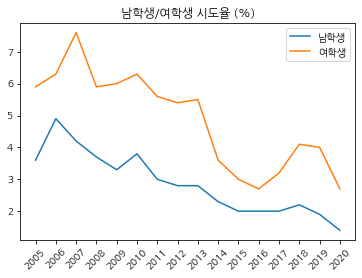

In [16]:
plt.title('남학생/여학생 시도율 (%)')
sns.lineplot(data=df_gender, dashes=False)
plt.xticks(rotation=45)
plt.show()

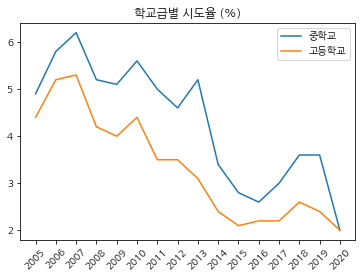

In [17]:
plt.title('학교급별 시도율 (%)')
sns.lineplot(data=df_school, dashes=False)
plt.xticks(rotation=45)
plt.show()

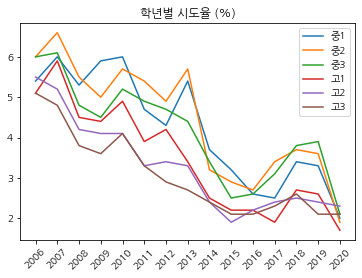

In [18]:
plt.title('학년별 시도율 (%)')
sns.lineplot(data=df_grade[1:], dashes=False)  # 2005년 고3 기록이 없음
plt.xticks(rotation=45)
plt.show()